In [2]:
from scipy.io import loadmat
# Load the MAT file
data_path = 'Data/cocy_clusters_ongoing2.mat'
data = loadmat(data_path)

# Explore the keys and structure of the loaded data
data_keys = list(data.keys())
data_structure = {key: type(data[key]) for key in data_keys}

# Provide the keys and their data types to understand the structure
data_keys, data_structure

(['__header__',
  '__version__',
  '__globals__',
  'cocy_clusters_f002_1230_2260',
  'cocy_clusters_f003_1230_2260',
  'cocy_clusters_f004_1230_2260',
  'cocy_clusters_f005_1230_2260',
  'cocy_clusters_f006_1230_2260',
  'cocy_clusters_f007_1230_2260',
  'cocy_clusters_f010_1230_2260',
  'cocy_clusters_f011_1230_2260',
  'cocy_clusters_f013_1230_2260',
  'cocy_clusters_f016_1230_2260'],
 {'__header__': bytes,
  '__version__': str,
  '__globals__': list,
  'cocy_clusters_f002_1230_2260': numpy.ndarray,
  'cocy_clusters_f003_1230_2260': numpy.ndarray,
  'cocy_clusters_f004_1230_2260': numpy.ndarray,
  'cocy_clusters_f005_1230_2260': numpy.ndarray,
  'cocy_clusters_f006_1230_2260': numpy.ndarray,
  'cocy_clusters_f007_1230_2260': numpy.ndarray,
  'cocy_clusters_f010_1230_2260': numpy.ndarray,
  'cocy_clusters_f011_1230_2260': numpy.ndarray,
  'cocy_clusters_f013_1230_2260': numpy.ndarray,
  'cocy_clusters_f016_1230_2260': numpy.ndarray})

In [27]:
import scipy.io

for key in [k for k in data.keys() if not k.startswith('__')]:
    # Define the file path for the new .mat file
    file_path = f'Data/fishes/{key}.mat'
    # Extract the structure and save it
    scipy.io.savemat(file_path, {key: data[key]})

In [49]:
import scipy.io

fish_data = scipy.io.loadmat('Data/fishes//fish02/cocy_clusters_f002_1230_2260.mat')
fish_1_structure = fish_data['cocy_clusters_f002_1230_2260']



positions_s1 = fish_1_structure['positions_s1'][0, 0]

positions_s2 = fish_1_structure['positions_s2'][0, 0]


### Plotting hemispheres 

In [4]:
import plotly.graph_objects as go

# Create a 3D scatter plot for both hemispheres with specified colors
fig = go.Figure()

# Hemisphere 1 - color: orange
fig.add_trace(go.Scatter3d(
    x=positions_s1[:, 0],
    y=positions_s1[:, 1],
    z=positions_s1[:, 2],
    mode='markers',
    marker=dict(
        size=2,  # Adjust marker size for visibility
        color='orange',  # Color for Hemisphere 1
        opacity=0.8,  # Adjust opacity to make it easier to see overlaps
    ),
    name='Hemisphere 1'
))

# Hemisphere 2 - color: blue
fig.add_trace(go.Scatter3d(
    x=positions_s2[:, 0],
    y=positions_s2[:, 1],
    z=positions_s2[:, 2],
    mode='markers',
    marker=dict(
        size=2,  # Adjust marker size for visibility
        color='blue',  # Color for Hemisphere 2
        opacity=0.8,  # Adjust opacity to make it easier to see overlaps
    ),
    name='Hemisphere 2'
))

# Update plot layout for a better view
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis'
    )
)

# Show the plot
fig.show()


### Plotting  S1

In [5]:
positions_s1_xyz = positions_s1[:, :3]
# Extract cluster index data for red and green clusters in Hemisphere 1 to check their structure

red_cocydex_s1 = fish_1_structure['red_cocydex_s1'][0, 0]

green_cocydex_s1 = fish_1_structure['green_cocydex_s1'][0, 0]

In [9]:
# Adjusting the approach to plot the spatial positions of inhibitory and excitatory neurons for Hemisphere 1
# Red clusters are inhibitory, and green clusters are excitatory

# Extracting cell indices for inhibitory (red) and excitatory (green) neurons
inh_indices_s1 = red_cocydex_s1[:, 0].astype(int) - 1  # Adjusting indices to Python's 0-based indexing
exc_indices_s1 = green_cocydex_s1[:, 0].astype(int) - 1

# Mapping these indices to positions
inh_positions_s1 = positions_s1_xyz[inh_indices_s1, :]

exc_positions_s1 = positions_s1_xyz[exc_indices_s1, :]

print(len(inh_positions_s1))

# Plotting
fig = go.Figure()

# Inhibitory neurons - red
fig.add_trace(go.Scatter3d(
    x=inh_positions_s1[:, 0],
    y=inh_positions_s1[:, 1],
    z=inh_positions_s1[:, 2],
    mode='markers',
    marker=dict(size=2, color='red', opacity=0.8),
    name='Inhibitory Neurons'
))

# Excitatory neurons - green
fig.add_trace(go.Scatter3d(
    x=exc_positions_s1[:, 0],
    y=exc_positions_s1[:, 1],
    z=exc_positions_s1[:, 2],
    mode='markers',
    marker=dict(size=2, color='green', opacity=0.8),
    name='Excitatory Neurons'
))

# Update plot layout for a better view
fig.update_layout(
    title='Spatial Positions of Inhibitory and Excitatory Neurons in Hemisphere 1',
    scene=dict(xaxis_title='X Axis', yaxis_title='Y Axis', zaxis_title='Z Axis')
)

# Show the plot
fig.show()


682


### Plotting  s2

In [51]:
positions_s2_xyz = positions_s2[:, :3]
# Extract cluster index data for red and green clusters in Hemisphere 1 to check their structure

red_cocydex_s2 = fish_1_structure['red_cocydex_s2'][0, 0]

green_cocydex_s2= fish_1_structure['green_cocydex_s2'][0, 0]

In [52]:
# Adjusting the approach to plot the spatial positions of inhibitory and excitatory neurons for Hemisphere 1
# Red clusters are inhibitory, and green clusters are excitatory

# Extracting cell indices for inhibitory (red) and excitatory (green) neurons
inh_indices_s2 = red_cocydex_s2[:, 0].astype(int) - 1  # Adjusting indices to Python's 0-based indexing
exc_indices_s2 = green_cocydex_s2[:, 0].astype(int) - 1

# Mapping these indices to positions
inh_positions_s2 = positions_s2_xyz[inh_indices_s2, :]

exc_positions_s2 = positions_s2_xyz[exc_indices_s2, :]


# Plotting
fig = go.Figure()

# Inhibitory neurons - red
fig.add_trace(go.Scatter3d(
    x=inh_positions_s2[:, 0],
    y=inh_positions_s2[:, 1],
    z=inh_positions_s2[:, 2],
    mode='markers',
    marker=dict(size=2, color='red', opacity=0.8),
    name='Inhibitory Neurons'
))

# Excitatory neurons - green
fig.add_trace(go.Scatter3d(
    x=exc_positions_s2[:, 0],
    y=exc_positions_s2[:, 1],
    z=exc_positions_s2[:, 2],
    mode='markers',
    marker=dict(size=2, color='green', opacity=0.8),
    name='Excitatory Neurons'
))

# Update plot layout for a better view
fig.update_layout(
    title='Spatial Positions of Inhibitory and Excitatory Neurons in Hemisphere 2',
    scene=dict(xaxis_title='X Axis', yaxis_title='Y Axis', zaxis_title='Z Axis')
)

# Show the plot
fig.show()


### Plotting and extracting clusters

In [55]:
import pandas as pd

# Extracting neuron IDs for red and green neurons using the fourth column from positions_s1
neuron_ids_red = positions_s1[inh_indices_s1, 3]
neuron_ids_green = positions_s1[exc_indices_s1, 3]

# Creating DataFrames for red and green neurons including the IDs
df_red_cluster_pos_s1 = pd.DataFrame({
    'Neuron_ID': neuron_ids_red,
    'X': positions_s1_xyz[inh_indices_s1, 0],
    'Y': positions_s1_xyz[inh_indices_s1, 1],
    'Z': positions_s1_xyz[inh_indices_s1, 2],
    'Cluster_Number': red_cocydex_s1[:, 1]
})

df_green_cluster_pos_s1 = pd.DataFrame({
    'Neuron_ID': neuron_ids_green,
    'X': positions_s1_xyz[exc_indices_s1, 0],
    'Y': positions_s1_xyz[exc_indices_s1, 1],
    'Z': positions_s1_xyz[exc_indices_s1, 2],
    'Cluster_Number': green_cocydex_s1[:, 1]
})

# Attempt to create these DataFrames and display their structure
df_red_cluster_pos_s1.head(), df_green_cluster_pos_s1.head()



(   Neuron_ID           X           Y         Z  Cluster_Number
 0       11.0   115.45122  230.888294  2.555899               7
 1       29.0  1558.59147  288.610367  3.194874               4
 2       40.0   628.90533  322.028410  3.564807               7
 3       82.0   270.39891  458.738584  5.078168               7
 4       84.0   686.63094  455.700580  5.044538               7,
    Neuron_ID           X           Y         Z  Cluster_Number
 0        1.0  2470.04847  194.432247  2.152336               3
 1        2.0  1558.59147  203.546259  2.253227               9
 2        3.0  1968.74712  200.508255  2.219597               9
 3        4.0  1443.14025  206.584263  2.286857               9
 4        5.0  2819.44032  215.698274  2.387748              11)

In [57]:
import pandas as pd

# Extracting neuron IDs for red and green neurons using the fourth column from positions_s1
neuron_ids_red = positions_s2[inh_indices_s2, 3]
neuron_ids_green = positions_s2[exc_indices_s2, 3]

# Creating DataFrames for red and green neurons including the IDs
df_red_cluster_pos_s2 = pd.DataFrame({
    'Neuron_ID': neuron_ids_red,
    'X': positions_s2_xyz[inh_indices_s2, 0],
    'Y': positions_s2_xyz[inh_indices_s2, 1],
    'Z': positions_s2_xyz[inh_indices_s2, 2],
    'Cluster_Number': red_cocydex_s2[:, 1]
})

df_green_cluster_pos_s2 = pd.DataFrame({
    'Neuron_ID': neuron_ids_green,
    'X': positions_s2_xyz[exc_indices_s2, 0],
    'Y': positions_s2_xyz[exc_indices_s2, 1],
    'Z': positions_s2_xyz[exc_indices_s2, 2],
    'Cluster_Number': green_cocydex_s2[:, 1]
})

# Attempt to create these DataFrames and display their structure
df_red_cluster_pos_s2.head(), df_green_cluster_pos_s2.head()


(   Neuron_ID          X            Y          Z  Cluster_Number
 0      523.0  209.63511  1376.215751  15.234504               8
 1      564.0  325.08633  1470.393871  16.277042               8
 2      570.0  103.29846  1485.583890  16.445193               8
 3      574.0  480.03402  1497.735905  16.579714               8
 4      578.0  528.64506  1506.849917  16.680605               8,
    Neuron_ID           X            Y          Z  Cluster_Number
 0      488.0  3117.18294  1306.341662  14.461008               8
 1      489.0  2424.47562  1315.455673  14.561899               8
 2      490.0  2652.33987  1306.341662  14.461008               8
 3      491.0  2980.46439  1315.455673  14.561899               8
 4      492.0  3032.11362  1315.455673  14.561899               8)

In [56]:
df_green_cluster_pos_s1.to_csv("Data/fishes/fish02/s1/df_red_cluster_pos_s1.csv", encoding='utf-8', index=False) 
df_red_cluster_pos_s1.to_csv("Data/fishes/fish02/s1/df_green_cluster_pos_s1.csv", encoding='utf-8', index=False) 


In [58]:
df_green_cluster_pos_s2.to_csv("Data/fishes/fish02/s2/df_red_cluster_pos_s2.csv", encoding='utf-8', index=False) 
df_red_cluster_pos_s2.to_csv("Data/fishes/fish02/s2/df_green_cluster_pos_s2.csv", encoding='utf-8', index=False)

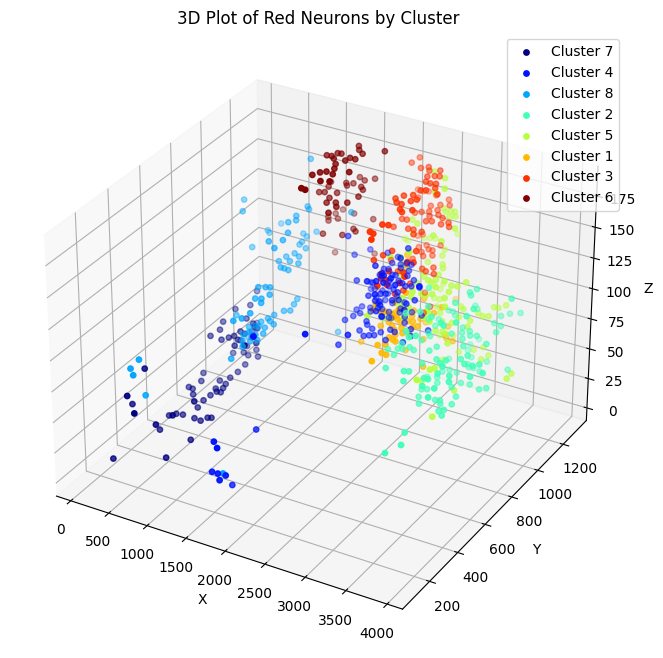

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming df_red_with_id contains the correct data for red neurons including their clusters
# Since we encountered an issue creating df_red_with_id directly here, this approach is hypothetical
# and should be replicated in your local environment with the actual DataFrame

# Start by finding unique cluster numbers for red neurons
unique_clusters_red = df_red_cluster_pos_s1['Cluster_Number'].unique()

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assign a color to each cluster
colors = plt.cm.jet(np.linspace(0, 1, len(unique_clusters_red)))

for cluster, color in zip(unique_clusters_red, colors):
    # Filter data for the current cluster
    cluster_data = df_red_cluster_pos_s1[df_red_cluster_pos_s1['Cluster_Number'] == cluster]
    # Plotting
    ax.scatter(cluster_data['X'], cluster_data['Y'], cluster_data['Z'], s=15, color=color, label=f'Cluster {cluster}')

ax.set_title('3D Plot of Red Neurons by Cluster')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()


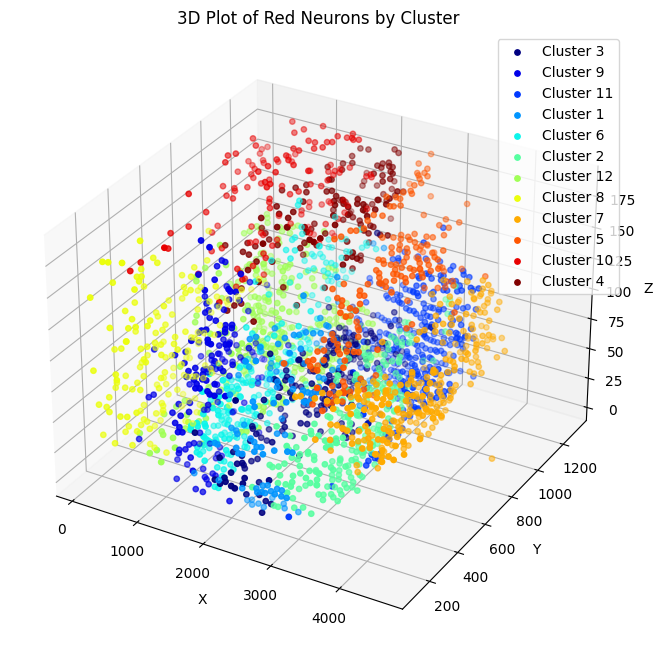

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming df_red_with_id contains the correct data for red neurons including their clusters
# Since we encountered an issue creating df_red_with_id directly here, this approach is hypothetical
# and should be replicated in your local environment with the actual DataFrame

# Start by finding unique cluster numbers for red neurons
unique_clusters_green= df_green_cluster_pos_s1['Cluster_Number'].unique()

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assign a color to each cluster
colors = plt.cm.jet(np.linspace(0, 1, len(unique_clusters_green)))

for cluster, color in zip(unique_clusters_green, colors):
    # Filter data for the current cluster
    cluster_data = df_green_cluster_pos_s1[df_green_cluster_pos_s1['Cluster_Number'] == cluster]
    # Plotting
    ax.scatter(cluster_data['X'], cluster_data['Y'], cluster_data['Z'], s=15, color=color, label=f'Cluster {cluster}')

ax.set_title('3D Plot of Red Neurons by Cluster')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()

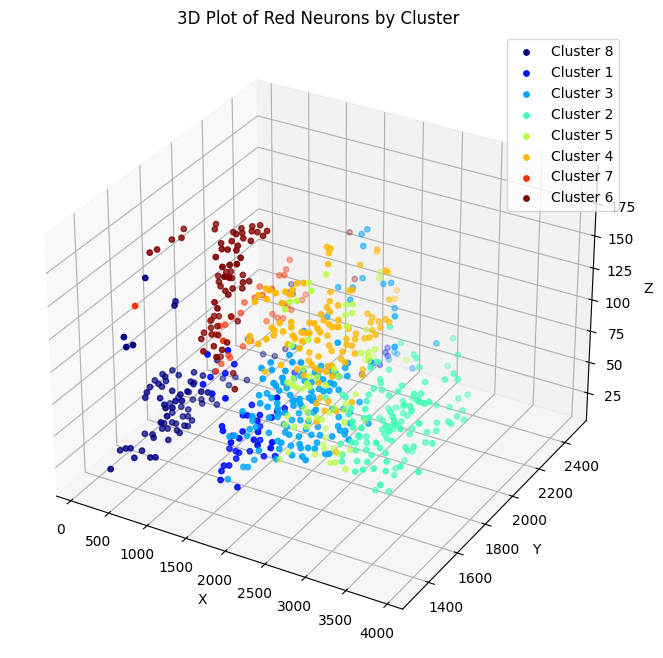

In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming df_red_with_id contains the correct data for red neurons including their clusters
# Since we encountered an issue creating df_red_with_id directly here, this approach is hypothetical
# and should be replicated in your local environment with the actual DataFrame

# Start by finding unique cluster numbers for red neurons
unique_clusters_red= df_red_cluster_pos_s2['Cluster_Number'].unique()

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assign a color to each cluster
colors = plt.cm.jet(np.linspace(0, 1, len(unique_clusters_red)))

for cluster, color in zip(unique_clusters_red, colors):
    # Filter data for the current cluster
    cluster_data = df_red_cluster_pos_s2[df_red_cluster_pos_s2['Cluster_Number'] == cluster]
    # Plotting
    ax.scatter(cluster_data['X'], cluster_data['Y'], cluster_data['Z'], s=15, color=color, label=f'Cluster {cluster}')

ax.set_title('3D Plot of Red Neurons by Cluster')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()

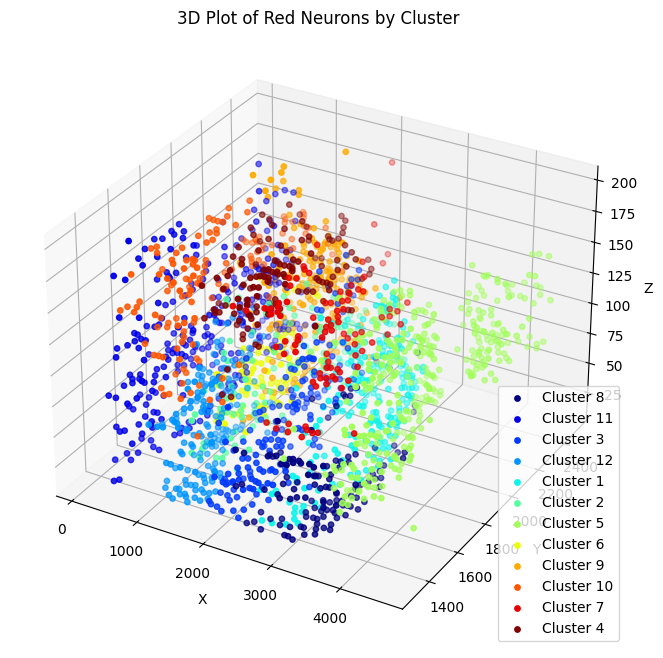

In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming df_red_with_id contains the correct data for red neurons including their clusters
# Since we encountered an issue creating df_red_with_id directly here, this approach is hypothetical
# and should be replicated in your local environment with the actual DataFrame

# Start by finding unique cluster numbers for red neurons
unique_clusters_green= df_green_cluster_pos_s2['Cluster_Number'].unique()

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assign a color to each cluster
colors = plt.cm.jet(np.linspace(0, 1, len(unique_clusters_green)))

for cluster, color in zip(unique_clusters_green, colors):
    # Filter data for the current cluster
    cluster_data = df_green_cluster_pos_s2[df_green_cluster_pos_s2['Cluster_Number'] == cluster]
    # Plotting
    ax.scatter(cluster_data['X'], cluster_data['Y'], cluster_data['Z'], s=15, color=color, label=f'Cluster {cluster}')

ax.set_title('3D Plot of Red Neurons by Cluster')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()

### Extracting timeseries of clusters S1

In [117]:
cluster_time_series_red_s1=fish_1_structure['cocy_mean_red_s1'][0,0]
cluster_time_series_red_s1=cluster_time_series_red_s1.T

cluster_time_series_green_s1=fish_1_structure['cocy_mean_green_s1'][0,0]
cluster_time_series_green_s1=cluster_time_series_green_s1.T

column_names_red = [f'Cluster {i+1}' for i in range(cluster_time_series_red_s1.shape[1])]
column_names_green = [f'Cluster {i+1}' for i in range(cluster_time_series_green_s1.shape[1])]

# Creating the DataFrame with named columns
df_timeseries_red_clusters_s1 = pd.DataFrame(cluster_time_series_red_s1, columns=column_names_red)
df_timeseries_green_clusters_s1 = pd.DataFrame(cluster_time_series_green_s1, columns=column_names_green)

df_timeseries_red_clusters_s1

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8
0,-0.465304,-0.039182,-0.145111,-0.820533,-0.043201,0.065635,-0.133898,-1.221447
1,-0.360442,0.565558,-0.029222,-0.730112,0.269952,0.325601,-0.065495,-0.490533
2,-0.204723,0.364503,0.119252,-0.529757,-0.244755,0.430598,0.164129,-0.567888
3,0.062240,0.274655,-0.139845,-0.408598,-0.201634,0.225573,-0.259828,-0.356369
4,-0.331344,0.372020,0.076066,-0.736249,-0.149454,0.482838,-0.297057,-0.240255
...,...,...,...,...,...,...,...,...
1026,-0.776604,-0.709191,0.198898,-0.416232,0.183228,-0.129994,-0.675661,-0.102535
1027,-0.740787,-0.690548,0.037362,-0.570908,0.100399,-0.310062,-0.334169,-0.667639
1028,-1.049494,-0.800837,0.240324,-0.657034,-0.188345,-0.117036,-0.609144,-0.770036
1029,-0.939454,-0.660230,0.058730,-0.215216,0.011012,-0.073275,-0.749173,-0.605966


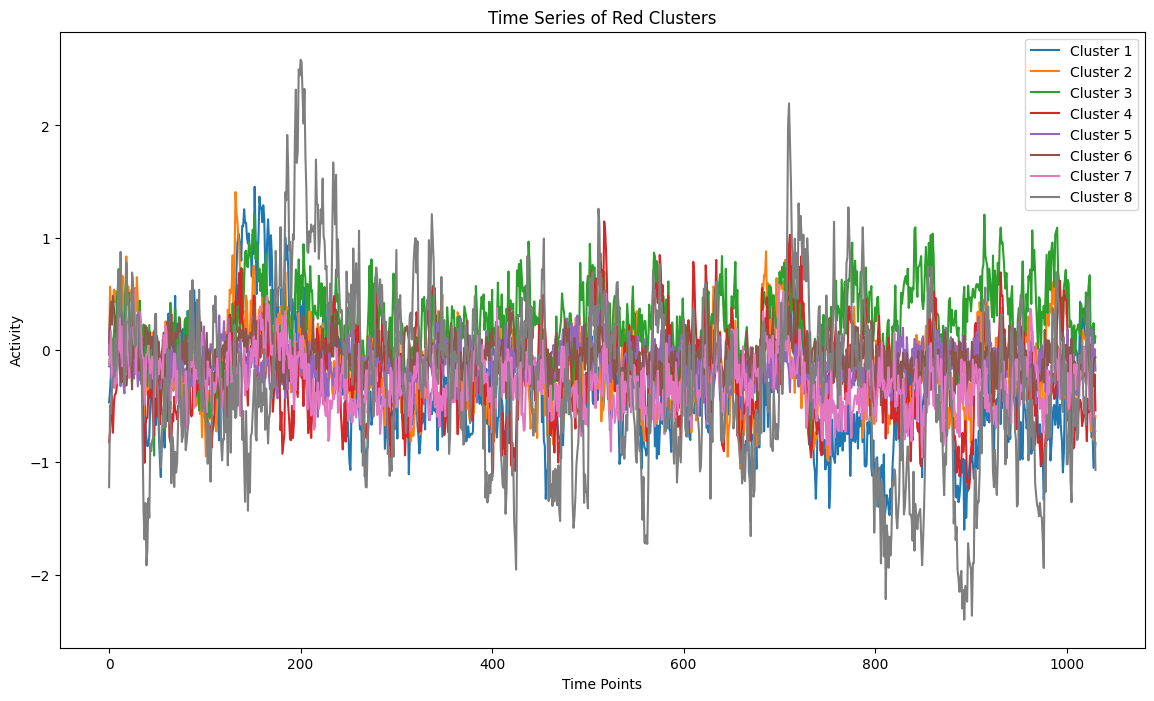

In [113]:
import matplotlib.pyplot as plt

# Assuming df_red_clusters is your DataFrame with each column being a time series for a cluster
plt.figure(figsize=(14, 8))  # Set the figure size for better visibility

# Iterate through each column in the DataFrame to plot each cluster's time series
for column in df_timeseries_red_clusters_s1.columns:
    plt.plot(df_timeseries_red_clusters_s1.index, df_timeseries_red_clusters_s1[column], label=column)

plt.title('Time Series of Red Clusters')  # Set the title of the plot
plt.xlabel('Time Points')  # Set the x-axis label
plt.ylabel('Activity')  # Set the y-axis label
plt.legend()  # Show a legend to identify each cluster

plt.show()  # Display the plot


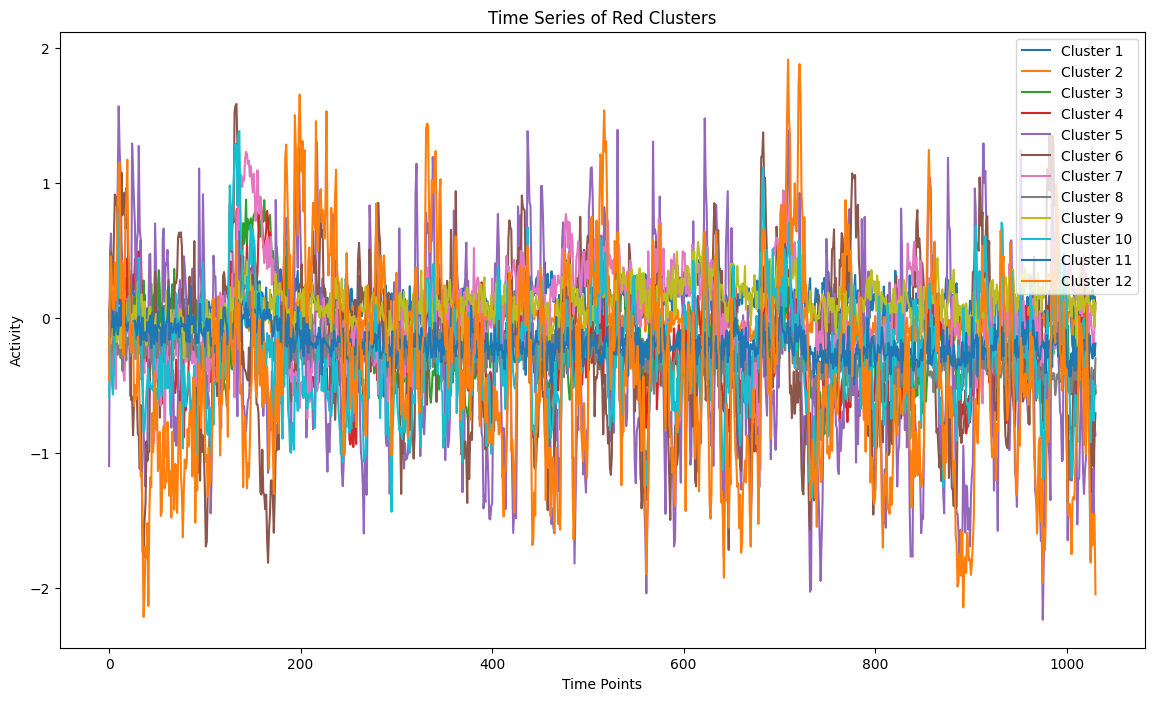

In [114]:
import matplotlib.pyplot as plt

# Assuming df_red_clusters is your DataFrame with each column being a time series for a cluster
plt.figure(figsize=(14, 8))  # Set the figure size for better visibility

# Iterate through each column in the DataFrame to plot each cluster's time series
for column in df_timeseries_green_clusters_s1.columns:
    plt.plot(df_timeseries_green_clusters_s1.index, df_timeseries_green_clusters_s1[column], label=column)

plt.title('Time Series of Red Clusters')  # Set the title of the plot
plt.xlabel('Time Points')  # Set the x-axis label
plt.ylabel('Activity')  # Set the y-axis label
plt.legend()  # Show a legend to identify each cluster

plt.show()  # Display the plot

In [104]:
df_timeseries_red_clusters_s1.to_csv("Data/fishes/fish02/s1/df_timeseries_red_clusters_s1.csv", encoding='utf-8', index=False) 
df_timeseries_green_clusters_s1.to_csv("Data/fishes/fish02/s1/df_timeseries_green_clusters_s1.csv", encoding='utf-8', index=False) 


###  Extracting timeseries of clusters S2

In [120]:
cluster_time_series_red_s2=fish_1_structure['cocy_mean_red_s2'][0,0]
cluster_time_series_red_s2=cluster_time_series_red_s2.T

cluster_time_series_green_s2=fish_1_structure['cocy_mean_green_s2'][0,0]
cluster_time_series_green_s2=cluster_time_series_green_s2.T

column_names_red = [f'Cluster {i+1}' for i in range(cluster_time_series_red_s2.shape[1])]
column_names_green = [f'Cluster {i+1}' for i in range(cluster_time_series_green_s2.shape[1])]

# Creating the DataFrame with named columns
df_timeseries_red_clusters_s2 = pd.DataFrame(cluster_time_series_red_s2, columns=column_names_red)
df_timeseries_green_clusters_s2= pd.DataFrame(cluster_time_series_green_s2, columns=column_names_green)
df_timeseries_green_clusters_s2

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12
0,-0.045155,-0.057026,-1.189544,-0.075210,-0.147581,0.185621,-0.060962,-0.473671,0.185250,0.030095,-0.209130,-0.144704
1,-0.192021,0.003965,-0.395168,-0.056063,-0.006011,0.487558,-0.075057,-0.169431,0.217182,0.116141,-0.176625,0.107027
2,0.092149,0.087439,-0.048424,-0.048751,0.055521,0.295386,-0.042303,-0.181962,-0.048547,0.121210,-0.249625,0.125422
3,-0.139971,-0.081563,-0.474683,-0.127960,0.069146,0.442235,-0.217588,-0.262486,0.504183,0.332504,-0.223825,-0.148232
4,0.059384,-0.014918,-0.634815,-0.091399,0.041809,-0.073000,-0.019247,-0.518799,0.294697,0.039957,-0.372642,0.124027
...,...,...,...,...,...,...,...,...,...,...,...,...
1026,-0.452897,-0.146114,-1.851342,0.175049,-0.142010,-0.974908,-0.414522,-0.456138,0.050827,-0.193651,-0.424621,0.389169
1027,-0.370555,-0.143327,-1.479970,0.049355,-0.030024,-0.930895,-0.387339,-0.516276,-0.024889,-0.308469,-0.394260,0.269652
1028,-0.447877,-0.050055,-1.947750,-0.099697,-0.141195,-0.890876,-0.282241,-0.895772,-0.009157,-0.551247,-0.579031,0.126761
1029,-0.494051,-0.081269,-1.799051,0.255089,-0.004100,-1.003566,-0.337831,-0.705154,-0.023417,-0.165208,-0.427929,0.236471


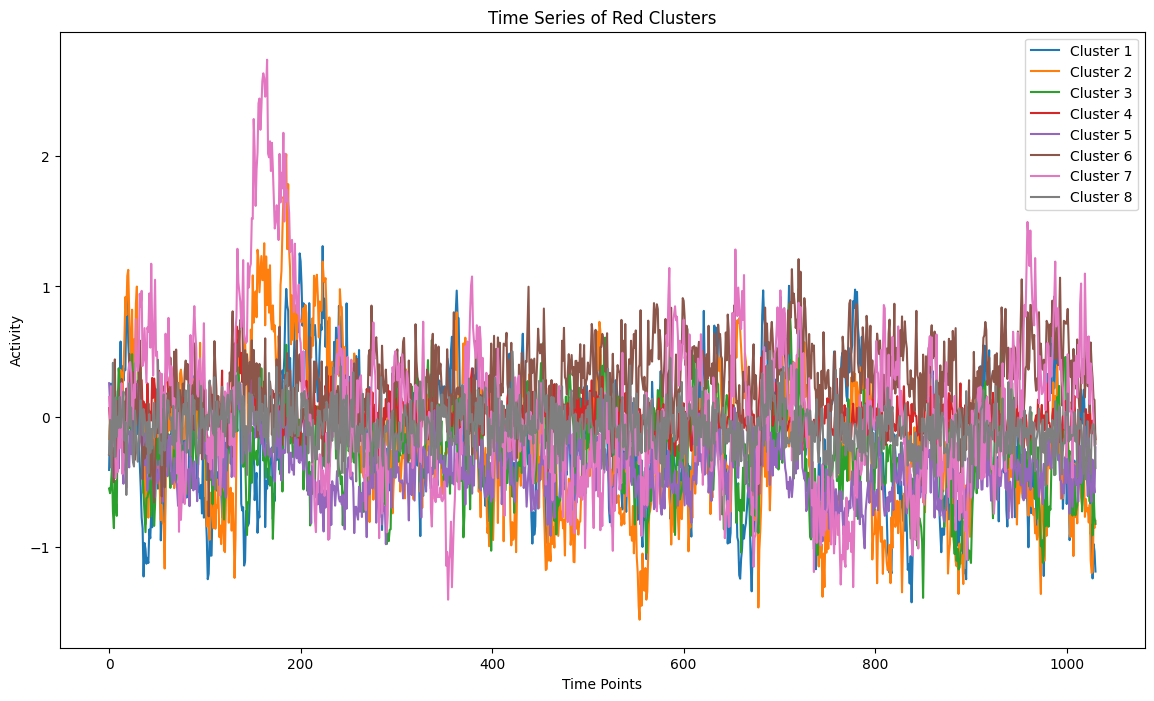

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))  # Set the figure size for better visibility

# Iterate through each column in the DataFrame to plot each cluster's time series
for column in df_timeseries_red_clusters_s2.columns:
    plt.plot(df_timeseries_red_clusters_s2.index, df_timeseries_red_clusters_s2[column], label=column)

plt.title('Time Series of Red Clusters')  # Set the title of the plot
plt.xlabel('Time Points')  # Set the x-axis label
plt.ylabel('Activity')  # Set the y-axis label
plt.legend()  # Show a legend to identify each cluster

plt.show()  # Display the plot


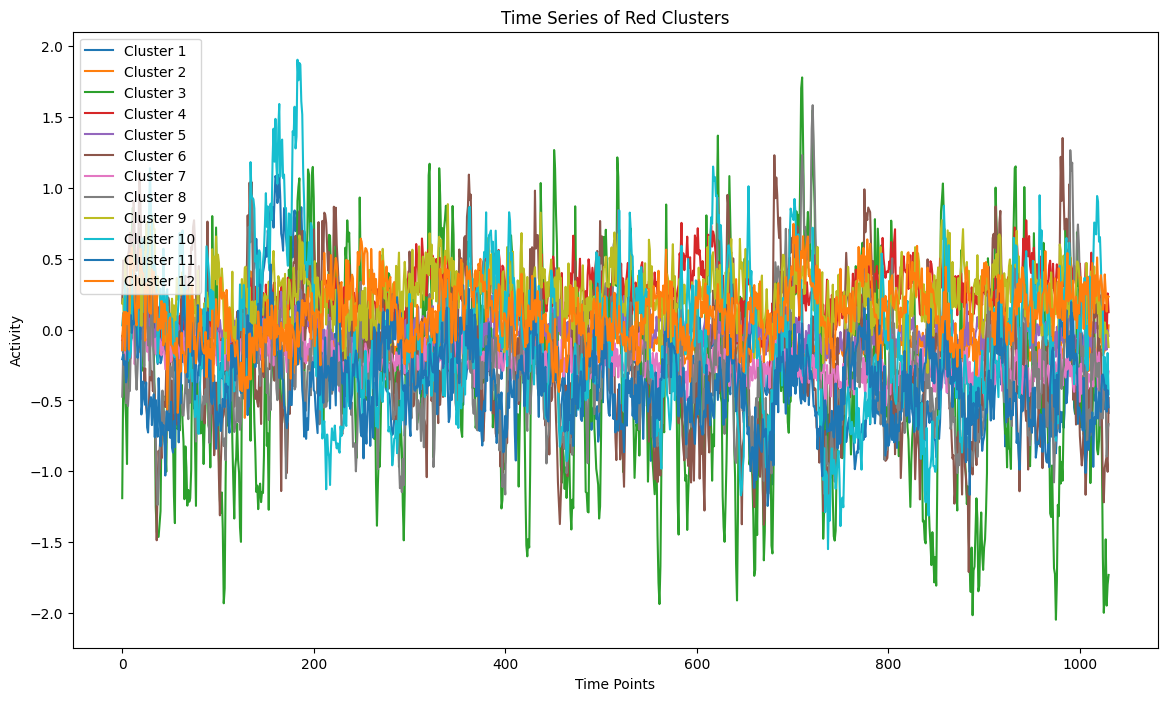

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))  # Set the figure size for better visibility

# Iterate through each column in the DataFrame to plot each cluster's time series
for column in df_timeseries_green_clusters_s2.columns:
    plt.plot(df_timeseries_green_clusters_s2.index, df_timeseries_green_clusters_s2[column], label=column)

plt.title('Time Series of Red Clusters')  # Set the title of the plot
plt.xlabel('Time Points')  # Set the x-axis label
plt.ylabel('Activity')  # Set the y-axis label
plt.legend()  # Show a legend to identify each cluster

plt.show()  # Display the plot


In [123]:
df_timeseries_red_clusters_s2.to_csv("Data/fishes/fish02/s2/df_timeseries_red_clusters_s2.csv", encoding='utf-8', index=False) 
df_timeseries_green_clusters_s2.to_csv("Data/fishes/fish02/s2/df_timeseries_green_clusters_s2.csv", encoding='utf-8', index=False) 
